Introduction to Machine Learning - Intermediate Edition 

Basics:
Linear and Logistic Regression are two forms of Superwised Machine Leaning i.e.; when we have labelled features.

--> Linear Regression is a model for creating a straight line that tries to minimize errors by using the Error function. This is used for predicting a target value using an intercept equation, which can have multiple features and coefficients according to their contribution. This is mainly for predicting continuous values like distance, price, etc. 

--> Logistic Regression is a model for creating an S-shaped curve for classification of objects, etc. Here, the main goal is to accurately segregate data into its respective category. This is mainly for predicting discrete values, like eye color, flower shape etc.

In [28]:
# LINEAR REGRESSION TASK:

In [1]:
import sklearn 
from sklearn import datasets 
import numpy as np
housing = datasets.fetch_california_housing() # Using the california housing dataset

In [2]:
print(housing.data[0])
print(housing.target[0])

[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
4.526


In [3]:
from sklearn.impute import SimpleImputer # - Imputer is used for data cleaning
imputer = SimpleImputer(strategy = 'mean')
imputed_data = imputer.fit_transform(housing.data)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

In [5]:
from sklearn.linear_model import LinearRegression

h_model = LinearRegression()
h_model.fit(scaled_data , housing.target)

LinearRegression()

In [6]:
print(h_model.intercept_)
print(h_model.coef_)
y_pred = h_model.predict(scaled_data)
print(y_pred)
print(housing.target)
print(scaled_data)

2.0685581690891386
[ 0.8296193   0.11875165 -0.26552688  0.30569623 -0.004503   -0.03932627
 -0.89988565 -0.870541  ]
[4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


In [7]:
import statsmodels.api as sm

# Adding a constant for the intercept
X = sm.add_constant(scaled_data)
y = housing.target
# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:07:44   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0686      0.005    410.326      0.0

Note: We could also use Non-Parametric methods (methods without a traditional math function) to handle the negative impact of outliers.

In [8]:
print(housing.target.shape)
print(y_pred.shape)
print(scaled_data.shape)

(20640,)
(20640,)
(20640, 8)


In [9]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

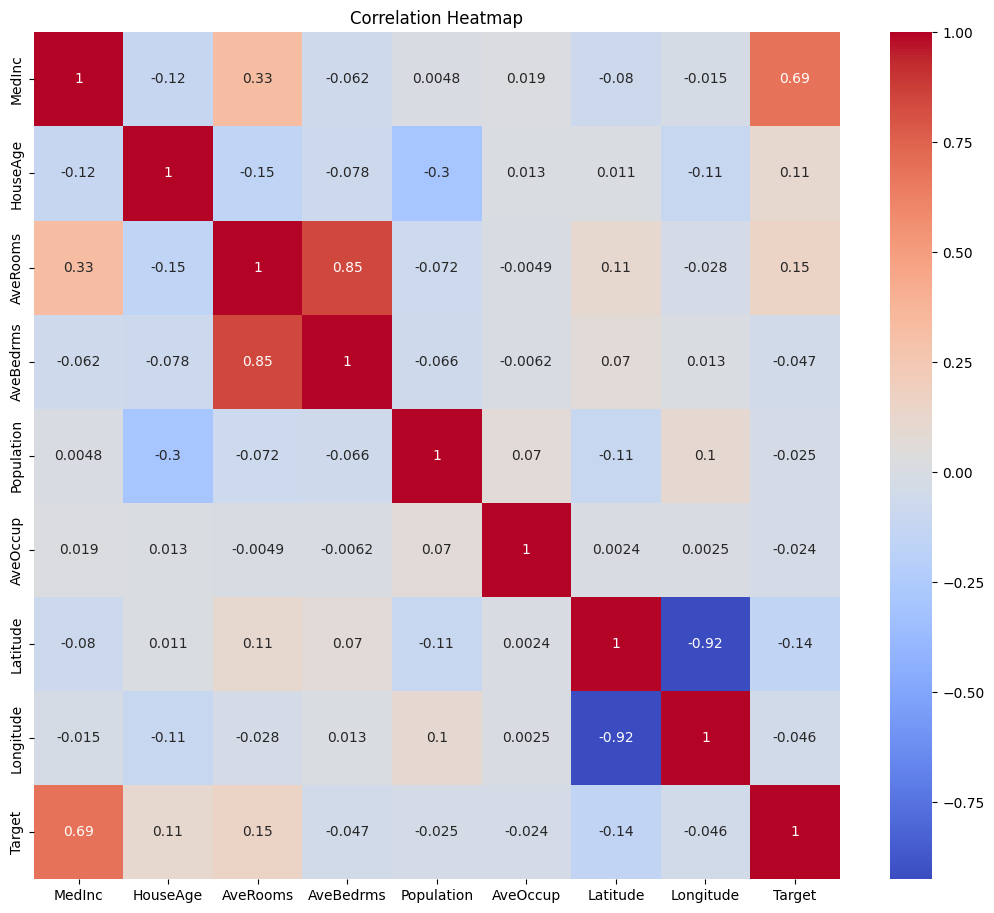

In [10]:
# Regression Line Plot - Visualizing the results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(scaled_data, columns = housing.feature_names)

data = pd.concat([df, pd.Series(housing.target, name="Target")], axis=1)
correlation_matrix = data.corr()

plt.figure(figsize=(13,11))
plt.tight_layout
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



-------------------------------------------------------------------------------------------------------------------------------

In [11]:
# LOGISTIC REGRESSION TASK:

In [12]:
iris_data = datasets.load_iris()

In [13]:
print(iris_data.data[0]) # feature values for the first sample - input values - independent values
print(iris_data.target[0]) # target values for the first sample - dependent variables -  we aim to predict or classify
# here 0,1,2 refer to the three categories of iris plants in the dataset
# just type iris_data.target - gives the list of target values- 0,1,2 - three categories of iris plants

[5.1 3.5 1.4 0.2]
0


In [14]:
from sklearn.impute import SimpleImputer # - Imputer is used for data cleaning
imputer = SimpleImputer(strategy = 'mean')
imputed_data = imputer.fit_transform(iris_data.data)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)
# Standardization is one way of feature scaling - that is, features need to be in a particular range of values
# for the machine learning model to work efficiently
# StandardScaler standardizes features to have mean 0 and variance 1. Other scalers are also available.

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_data , iris_data.target)

LogisticRegression()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, iris_data.target)
predictions = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [19]:
# Hyperparameter Tuning - tuning the hyperparameter values for optimal ML model performance

# Model parameter values like coefficients and intercepts are learnt during the training of a model
# whereas, hyperparameters are model configuration settings that control how the ML model learns (learning rate, etc.)

# C → Regularization strength in Logistic Regression (higher C = less regularization, lower C = more regularization).
# cv → Cross-validation folds (cv=5 means dataset is split into 5 parts, training on 4 and validating on 1, rotating through all).

In [20]:
# Grid Search: Tries all possible combinations of hyperparameters you specify and picks the best one.
# Normal Search (Manual tuning): You adjust hyperparameters one by one based on trial and error.
# Grid Search is systematic but slower, while manual tuning is faster but less thorough.

In [21]:
from sklearn.model_selection import GridSearchCV
params = {'C' : [0.1,1,10]}
grid_search = GridSearchCV(model,params,cv=5)
grid_search.fit(scaled_data , iris_data.target)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [22]:
# Cross-validation provides more reliable evaluation of hyperparameters:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model , scaled_data , iris_data.target , cv = 5)

# It splits the data into 5 folds and evaluates performance on each.

In [23]:
# Before applying grid_search
print(cross_val_scores)

[0.96666667 1.         0.93333333 0.9        1.        ]


In [24]:
# To test the improvement of hyperparameter values after grid search

best_model = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_model, scaled_data, iris_data.target, cv=5)
print(cross_val_scores)

[1.         1.         0.93333333 0.93333333 1.        ]


In [25]:
# If you want other metrics (e.g., precision, recall, F1-score, accuracy), specify scoring:

c1 = cross_val_score(model, scaled_data, iris_data.target, cv=5, scoring='f1_macro')
print(c1)
c2 = cross_val_score(best_model, scaled_data, iris_data.target, cv=5, scoring='f1_macro')
print(c2)

[0.96658312 1.         0.93265993 0.89974937 1.        ]
[1.         1.         0.93265993 0.93333333 1.        ]


In [26]:
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


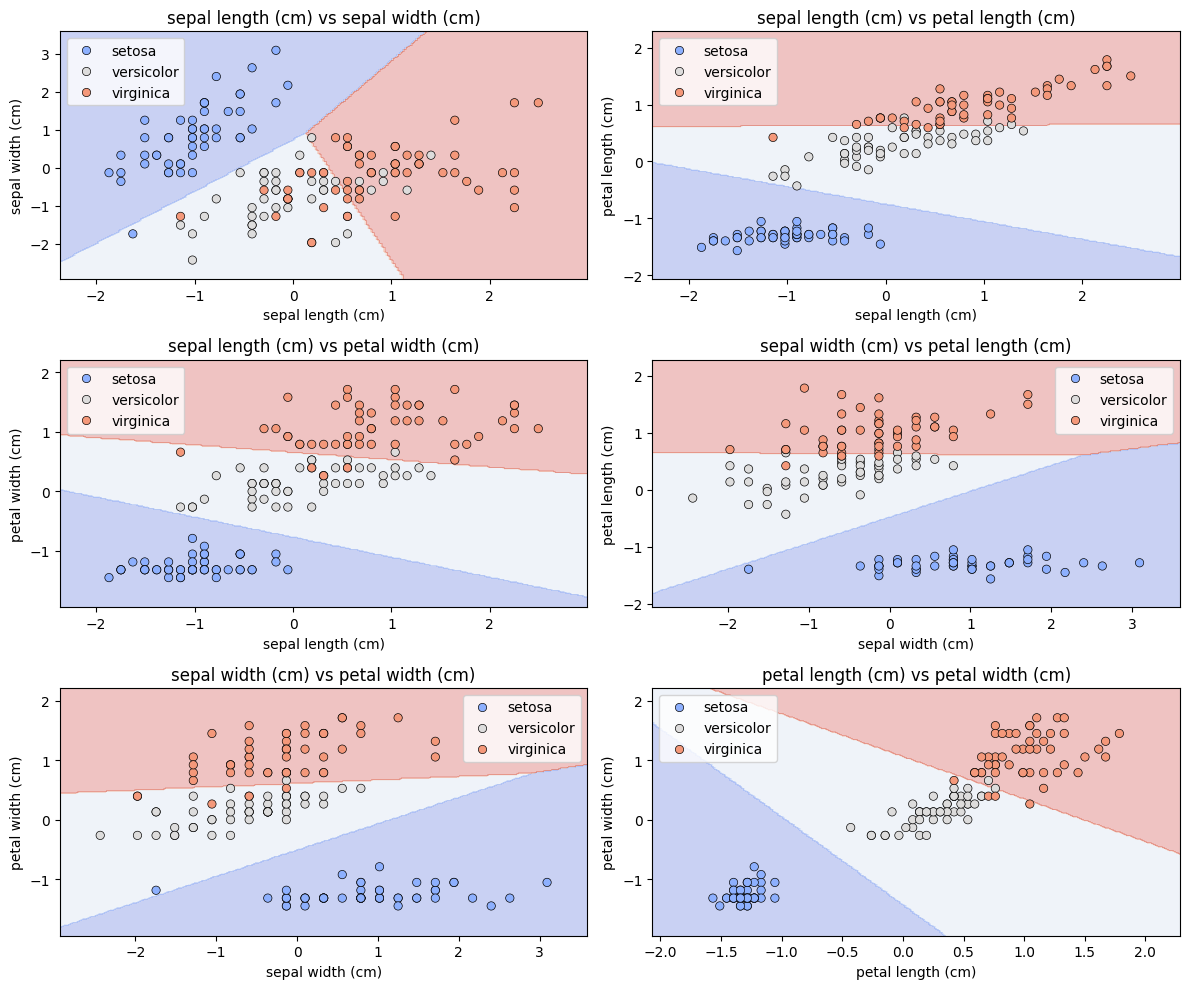

In [27]:
# Visualizing Decision Boundaries

from itertools import combinations

print(iris_data.feature_names)
# Load dataset
iris = datasets.load_iris()
X, y = scaled_data, iris.target
feature_names = iris.feature_names

# Plot decision boundaries for all feature pairs
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for ax, (i, j) in zip(axes.ravel(), combinations(range(4), 2)):
    X_pair = X[:, [i, j]]  # Select only two features
    model = LogisticRegression(max_iter=200)  # Train new model
    model.fit(X_pair, y)

    # Create mesh grid
    x_min, x_max = X[:, i].min() - 0.5, X[:, i].max() + 0.5
    y_min, y_max = X[:, j].min() - 0.5, X[:, j].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X[:, i], y=X[:, j], hue=iris.target_names[y], palette="coolwarm", edgecolor="k", ax=ax)
    
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel(feature_names[j])
    ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")

plt.tight_layout()
plt.show()
